# Coding vector control interventions

In the previous discussion prompt, you started thinking about the different parameters of the vectorial capacity and how they relate to interventions for vector control. Have a look at the answers to the questions now:

## Vectorial capacity questions

### Part 1: Interpreting the vectorial capacity equation

\begin{align}
V = \frac{m a^2 p^n}{-ln(p)}
\end{align}

where $m$ is the ratio of vectors to hosts, $a$ is the daily biting rate, $p$ is the probability of the vector surviving through one day and $n$ is the average duration of the extrinsic incubaton period in days.

**Question 1: Can you think of a reason why the biting rate is present more than once in the equation (i.e. it is squared)?**  
The biting rate is counted twice in the equation because the vector has to take 2 bites to transmit - once to become infected, and a second time to pass it on.

**Question 2: How do changes in the vector-to-host ratio change a) the rate at which vectors bite, and b) the rate at which humans are bitten?**  
In these equations, changes in the vector-to-host ratio do not affect a) the rate at which vectors bite, which is defined in a separate parameter (the biting rate $a$) and represents the numbers of bloodmeals taken by each vector per unit time on average, irrespective of how many vectors there are and independent of the given host (humans). However, increasing the vector-to-host ratio will also increase b) the rate at which human hosts are bitten, which is the product $ma$ (units of bites per day).  
Reality is of course more complex, and changes in these parameters are often interacting, so that the biting rate on humans may also depend on changes in host or vector density.

**Question 3: What is $p^n$?**  
$p$ is the probability of the vector surviving through one day and $n$ is the average duration of the extrinsic incubation period in days, so $p^n$ is the probability of the vector surviving through the extrinsic incubation period.

**Question 4: Why is the duration of the latent period, $n$, important to account for in models of mosquito-borne diseases?**  
Because mosquitoes live only for a short time, the latent period of the pathogen is often a considerable proportion of the mosquito's life expectancy. Therefore, changes in both the life expectancy and incubation period of the pathogen in the vector can have important effects on transmission.

### Part 2: Implications for vector control

For *Aedes aegypti*, the main mosquito transmitting dengue virus, estimated parameter values in the Bello municipality in Colombia are (Catano-Lopez, 2019):  
$m$ = 3, $a$ = 0.29 days-1, $p$ = 0.98, $n$ = 6 days    
This gives a vectorial capacity of around 11.

Below are 4 plots, showing how the vectorial capacity changes for varying values of each parameter, while keeping the other parameters constant. The vertical line indicates the *Aedes aegypti* parameter assumptions above.

<img src = "../GraphicsAndData/vectorial_capacity_plot.png">

**Question 5: Keeping all other parameters constant, by how much (approximately) would you have to change each parameter to reduce the vectorial capacity by half?**  
Based on the plots (or the equation), to reduce the vectorial capacity to around 5.5 while keeping all other parameter values constant, we would need to:
-	reduce $m$ by 50% (linear relationship between $m$ and $V$)
-	reduce $a$ from 0.29 to 0.2 (31% reduction)
-	reduce $p$ from 0.98 to 0.965 (1.5% reduction)
-	increase $n$ from 6 to 40 days (over 600% increase). 

**Question 6: Based on your answer to question 5, which two parameters would you preferentially target with vector control interventions? In both cases, give an example of an appropriate intervention.**  
The vectorial capacity is most sensitive to changes in the probability of survival through one day, $p$, and the biting rate, $a$: we only need to achieve small reductions in these parameters to achieve a large reduction in the vectorial capacity. Therefore, these might represent the most efficient targets for vector control. Mosquito survival can be reduced using insecticides targeting the adult stage or *Wolbachia*, whereas the biting rate can be reduced through the use of personal protective interventions (e.g. long-sleeved clothes, insect repellent).

**Question 7: When studying the impact of vector control interventions on dengue, what else would we need to account for?**  
The vectorial capacity only captures the future number of potentially infectious mosquito bites through properties of the mosquito and relies on a number of assumptions (see the Dye 1986 review for details on assumptions). To study the impact of vector control interventions on the transmission of dengue, we would also need to account for the biology and epidemiology of dengue infection in humans, as well as the efficacy and properties of any available interventions, including compliance. 

This is what we will be doing in the following coding exercise!

## Modelling vector control interventions

The format for this etivity is slightly different - rather than developing your own model of dengue control, your task is to interpret the code blocks given below.
 
In the present exercise, the two code cells cover different interventions, and thereby also introduce you to two different ways of modelling implementation of interventions **during** an outbreak. Remember that so far, we have only represented interventions like vaccination and treatment to be implemented from the start of the simulation, before the beginning of the outbreak. However, in reality an infection is often already established or an outbreak has begun before control measures are taken. In each case, the code is for the dengue model you developed in the previous etivity, but with the addition of a **vector control intervention**.

Code block 1 represents an example of an intervention which changes the value of a parameter over time, and code block 2 is an example of an intervention which instantaneously affects the population at a specific timepoint. Examine and interpret the dengue model code in each cell and answer the corresponding questions. For comparison purposes, here is the output from the dengue model without interventions from the previous etivity:

<img src = "../GraphicsAndData/w11_nb2_plot.png">

## Intervention 1:

Loading required package: deSolve
Loading required package: reshape2
Loading required package: ggplot2


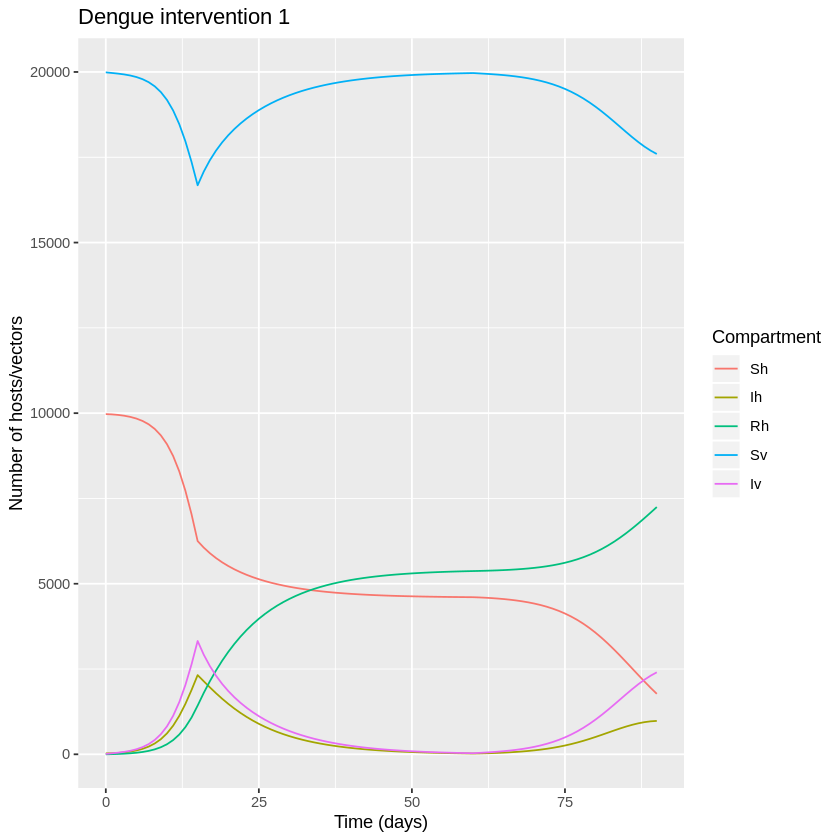

In [1]:
# PACKAGES
require(deSolve)
require(reshape2)
require(ggplot2)

# INPUT
Nh <- 10000   # total number of hosts
Nv <- 20000   # total number of vectors

initial_state_values <- c(Sh = Nh-0.0028*Nh, 
                          Ih = 0.0028*Nh, 
                          Rh = 0, 
                          Sv = Nv-0.00057*Nv,
                          Iv = 0.00057*Nv)

parameters <- c(a = 1,       # mosquito biting rate per day
                b_v = 0.4,   # probability of infection from an infected host to a susceptible vector
                b_h = 0.4,   # probability of infection from an infected vector to a susceptible host
                u_v = 0.25,  # mortality/recruitment rate of the vector
                r = 0.167)   # recovery rate from dengue in humans

times <- seq(from = 0, to = 90, by = 1)

# SIR MODEL FUNCTION
vbd_model <- function(time, state, parameters) {  
  
  with(as.list(c(state, parameters)), {
    
    Nh <- Sh + Ih + Rh   # total human population
    Nv <- Sv + Iv        # total vector population
      
    if (time <= 15){ 
        a = 1
    } else if (time > 15 & time <= 60){
        a = 0.25
    } else if (time > 60) {
        a = 1    
    }
      
    # The differential equations
    # Host population dynamics:
    dSh <- -a*b_h*Sh*Iv/Nh
    dIh <- a*b_h*Sh*Iv/Nh - r * Ih
    dRh <- r * Ih
    # Vector population dynamics:
    dSv <- u_v * Nv - a*b_v*Sv*Ih/Nh - u_v * Sv
    dIv <- a*b_v*Sv*Ih/Nh - u_v * Iv            
    
    # Output
    return(list(c(dSh, dIh, dRh, dSv, dIv))) 
  })
}

# Solve the equations
output1 <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = vbd_model,
                            parms = parameters))

output1_long <- melt(as.data.frame(output1), id = "time")                  # turn output dataset into long format

# Plot the number of mosquitoes and humans in each compartment over 3 months
ggplot(data = output1_long,                                               
       aes(x = time, y = value, colour = variable, group = variable)) +  
  geom_line() +                                                          
  xlab("Time (days)")+                                                   
  ylab("Number of hosts/vectors") +                                     
  labs(colour = "Compartment",                                           
       title = "Dengue intervention 1")     

### 1a) Based on the code, what effect does the intervention have on the natural history of the infection and how effective is it at this? 
### 1b) Give an example of an intervention this might represent and describe in more detail how it is implemented in the code (e.g. when, for how long). 
### 1c) Based on the plot, how does the intervention affect the prevalence of infection in humans?


## Intervention 2

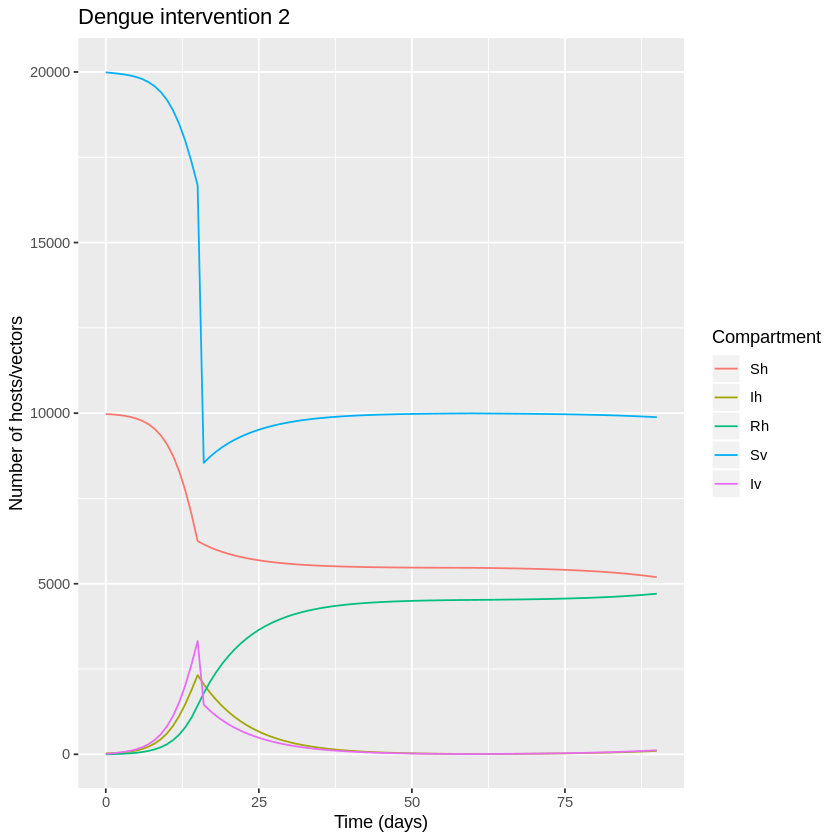

In [2]:
# INPUT
Nh <- 10000   # total number of hosts
Nv <- 20000   # total number of vectors

initial_state_values <- c(Sh = Nh-0.0028*Nh, 
                          Ih = 0.0028*Nh, 
                          Rh = 0, 
                          Sv = Nv-0.00057*Nv,
                          Iv = 0.00057*Nv)

parameters <- c(a = 1,       # mosquito biting rate per day
                b_v = 0.4,   # probability of infection from an infected host to a susceptible vector
                b_h = 0.4,   # probability of infection from an infected vector to a susceptible host
                u_v = 0.25,  # mortality/recruitment rate of the vector
                r = 0.167)   # recovery rate from dengue in humans

times <- seq(from = 0, to = 90, by = 1)

eventdata <- data.frame(var = c("Sv","Iv"), time = c(15,15),
                        value = c(0.5,0.5), method = "multiply")

output2 <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = vbd_model,
                            parms = parameters,
                            events = list(data = eventdata)))

output2_long <- melt(as.data.frame(output2), id = "time")                  # turn output dataset into long format

# Plot the number of mosquitoes and humans in each compartment over 3 months
ggplot(data = output2_long,                                               
       aes(x = time, y = value, colour = variable, group = variable)) +  
  geom_line() +                                                          
  xlab("Time (days)")+                                                   
  ylab("Number of hosts/vectors") +                                     
  labs(colour = "Compartment",                                           
       title = "Dengue intervention 2")     

### 1a) Based on the code, what effect does the intervention have on the natural history of the infection and how effective is it at this?   
### 1b) Give an example of an intervention this might represent and describe in more detail how it is implemented (e.g. when, for how long). 
### 1c) Based on the plot, how does the intervention affect the prevalence of infection in humans?

*Hint: the ?events help command can help you to interpret this example.**

## References

Catano-Lopez, A., Rojas-Diaz, D., Laniado, H., Arboleda-Sánchez, S., Puerta-Yepes, M.E. and Lizarralde-Bejarano, D.P., 2019. An alternative model to explain the vectorial capacity using as example Aedes aegypti case in dengue transmission. Heliyon, 5(10), p.e02577.

Dye, C., 1986. Vectorial capacity: must we measure all its components?. Parasitology Today, 2(8), pp.203-209.